In [47]:
#Test_classification_fashionMnist
import tensorflow as tf
model = tf.keras.models.load_model( r".\save_model/fashion_mnist_classification.keras")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [48]:
import pickle
encoder=None
with open(r"./save_model/fashion_mnist.classification_encoder","rb") as fp:
    encoder = pickle.load(fp)
print(encoder.one_hot_to_label([[0,1,0,0,0,0,0,0,0,0]]))


['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
['Trouser']


In [49]:
datasets = tf.keras.preprocessing.image_dataset_from_directory(
    r"E:\jupyter\data\fashion_mnist\test_img",
    labels=None,
    color_mode='grayscale',
    image_size=(28, 28),
    interpolation='nearest')
print(type(datasets))
import numpy as np
x_real = np.array([ d for d in datasets][0])
x_real = x_real.reshape(len(x_real),28,28)
x_real = 255.-x_real
print(x_real.shape)
for data in x_real:
    bakcolor_value = max(data[0]) if max(data[0]) - max(data[-1]) > 0 else max(data[-1])
    maskdata = data>bakcolor_value
    data = data[maskdata]
    print(data[0])

Found 5 files belonging to 1 classes.
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
(5, 28, 28)
226.0
9.0
135.0
135.0
223.0


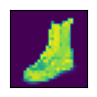

1. T-shirt/top	2. Trouser	3. Pullover	4. Dress	5. Coat	6. Sandal	7. Shirt	8. Sneaker	9. Bag	10. Ankle boot	


이미지 정답 라벨 번호를 입력하세요
 10


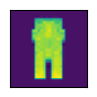

1. T-shirt/top	2. Trouser	3. Pullover	4. Dress	5. Coat	6. Sandal	7. Shirt	8. Sneaker	9. Bag	10. Ankle boot	


이미지 정답 라벨 번호를 입력하세요
 2


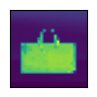

1. T-shirt/top	2. Trouser	3. Pullover	4. Dress	5. Coat	6. Sandal	7. Shirt	8. Sneaker	9. Bag	10. Ankle boot	


이미지 정답 라벨 번호를 입력하세요
 9


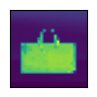

1. T-shirt/top	2. Trouser	3. Pullover	4. Dress	5. Coat	6. Sandal	7. Shirt	8. Sneaker	9. Bag	10. Ankle boot	


이미지 정답 라벨 번호를 입력하세요
 9


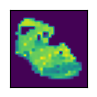

1. T-shirt/top	2. Trouser	3. Pullover	4. Dress	5. Coat	6. Sandal	7. Shirt	8. Sneaker	9. Bag	10. Ankle boot	


이미지 정답 라벨 번호를 입력하세요
 6


['Ankle boot', 'Trouser', 'Bag', 'Bag', 'Sandal']


In [54]:
import matplotlib.pyplot as plt
y_real=[]
label_list = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
            "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

for ix in range(len(x_real)):
    plt.figure(figsize=(1,1))
    plt.imshow(x_real[ix])
    plt.xticks([]);plt.yticks([])
    plt.show()
    for i in range(len(label_list)):
        print(f"{i+1}. {label_list[i]}\t",end="")
    print()
    usersel = input("이미지 정답 라벨 번호를 입력하세요\n")
    y_real.append(label_list[int(usersel)-1])
print(y_real)
    

In [55]:
print(x_real.shape)
print(y_real)

(5, 28, 28)
['Ankle boot', 'Trouser', 'Bag', 'Bag', 'Sandal']


In [56]:
y_pred = model.predict(x_real)
print(y_pred.shape)
print(y_pred)

1/1 [==============================] - 0s 31ms/step
(5, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [57]:
y_pred = encoder.one_hot_to_label(y_pred)
print(y_pred)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
['Ankle boot', 'Trouser', 'Bag', 'Bag', 'Bag']


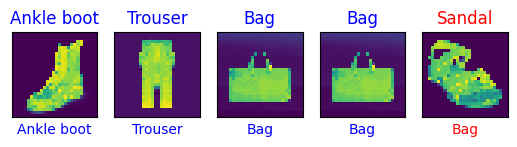

In [58]:
for ix in range(len(y_pred)):
    plt.subplot(1,5,ix+1)
    plt.imshow(x_real[ix])
    clr = "blue"
    if y_real[ix]!=y_pred[ix]:clr="red"
    plt.xticks([]);plt.yticks([])
    plt.title(y_real[ix],color=clr)
    plt.xlabel(y_pred[ix],color=clr)

plt.show()